In [1]:
import pandas as pd
data = pd.read_csv("student_scores.csv")
print(data.head(10))

     name  hours  score gender grades class
0   Aarav      8     76      M      A    9A
1    Riya      5     62      F      B    9B
2   Kabir     10     88      M      A   10A
3    Sana      4     55      F      C    9A
4  Vivaan      7     72      M      B   10B
5  Ishita      6     64      F      B    9C
6   Rohan      3     48      M      D    9B
7   Meera      9     90      F      A   11A
8  Aditya      2     38      M      F    9C
9   Kavya     11     93      F      A   12A


In [ ]:
#Info
print(data.columns.tolist())
print(data.info())

#Completeness
print(data.isnull().sum())

#Consistency
print(data.dtypes)

['name', 'hours', 'score', 'gender', 'grades', 'class']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    92 non-null     object
 1   hours   92 non-null     int64 
 2   score   92 non-null     int64 
 3   gender  92 non-null     object
 4   grades  92 non-null     object
 5   class   92 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.4+ KB
None
name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64
name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object


           hours      score
count  92.000000  92.000000
mean    6.510870  68.836957
std     2.265336  15.692286
min     2.000000  35.000000
25%     5.000000  57.000000
50%     7.000000  70.000000
75%     8.000000  82.000000
max    11.000000  94.000000
gender
F    0.51087
M    0.48913
Name: proportion, dtype: float64
grades
B    0.358696
A    0.326087
C    0.195652
D    0.086957
F    0.032609
Name: proportion, dtype: float64
class
9A     0.141304
10A    0.119565
9B     0.108696
9C     0.108696
10B    0.086957
11A    0.086957
10C    0.076087
12A    0.065217
12B    0.065217
11B    0.054348
12C    0.054348
11C    0.032609
Name: proportion, dtype: float64


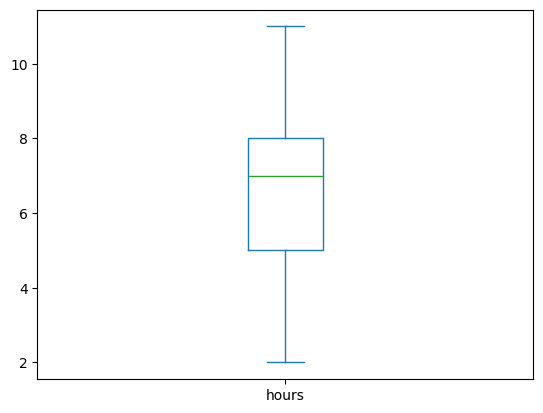

In [ ]:
#Accuracy
print(data.describe())
data['hours'].plot(kind='box')

#Bias
print(data['gender'].value_counts(normalize=True))
print(data['grades'].value_counts(normalize=True))
print(data['class'].value_counts(normalize=True))


## 33.4.2  Dataset Specification Sheet

| **Field**           | **Details** |
|---------------------|-------------|
| **Dataset Name**    | `student_performance_data.csv` (demo dataset) |
| **Description**     | Contains student study behavior and academic performance data used to demonstrate Data Quality checks including Completeness, Consistency, Accuracy, Bias analysis, and basic feature engineering. |
| **Features**        | `name`, `hours`, `score`, `gender`, `grades`, `class` |
| **Target Variable** | *None* (Exploratory dataset only) |
| **Number of Rows**  | 92 |
| **Null Handling**   | No missing values detected across any feature |
| **Transformations** | Label encoding applied to `class` → `class_encoded`; datatype validation performed; value distribution and proportion analysis conducted for `gender`, `grades`, and `class` |
| **Owner**           | Student / Notebook Author |
| **Last Updated**    | 2025-12-19 |

In [7]:
categorical = data.select_dtypes(include='object').columns
numerical = data.select_dtypes(exclude='object').columns

print("Categorical Features", list(categorical))
print("Numerical Features", list(numerical))

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data["class_encoded"] = le.fit_transform(data["grades"])

X = data[["hours"]]
y = data["score"]

Categorical Features ['name', 'gender', 'grades', 'class']
Numerical Features ['hours', 'score']


Text(0.5, 1.0, 'Distribution of Student Scores')

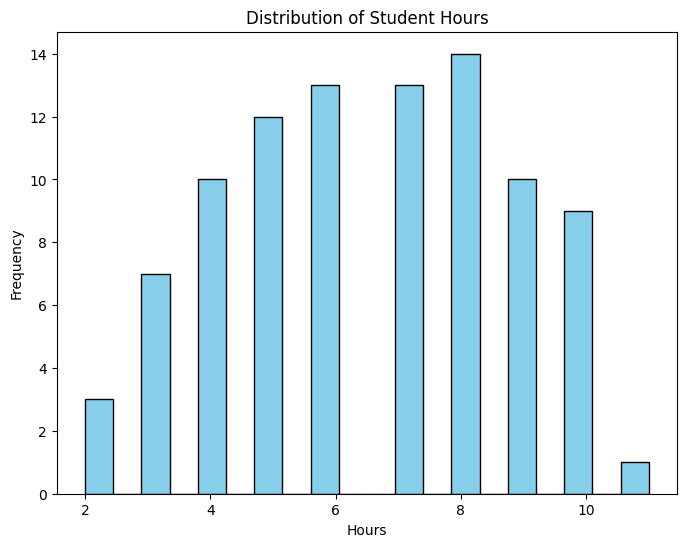

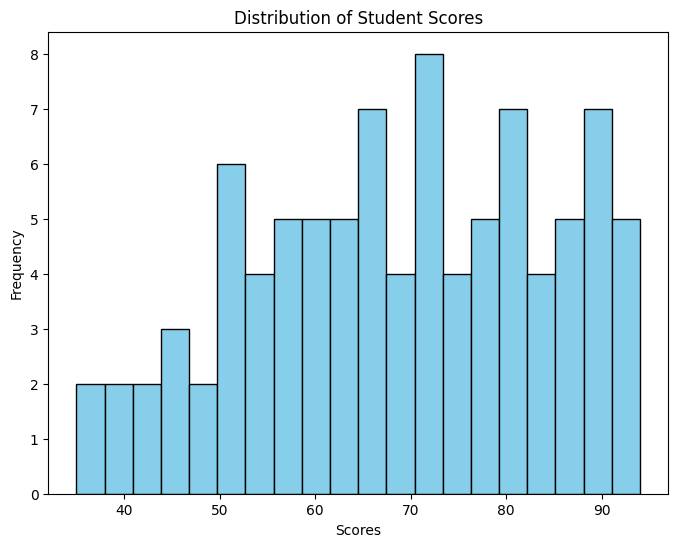

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(X, bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Distribution of Student Hours")

plt.figure(figsize=(8,6))
plt.hist(y, bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Distribution of Student Scores")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print(X_train, X_test, y_train, y_test)

    hours
65      8
15      8
68      7
78      6
30      5
..    ...
20      8
60      4
71      6
14      6
51     10

[73 rows x 1 columns] X     hours
40      8
22      9
55      3
72      2
0       8
26      8
39      7
67      9
10      5
44      3
83      5
35      8
89      7
62      3
12      4
4       7
18      6
28     10
49      6 y 65    80
15    78
68    71
78    65
30    59
      ..
20    80
60    52
71    67
14    66
51    94
Name: score, Length: 73, dtype: int64 Z 40    81
22    84
55    40
72    36
0     76
26    82
39    75
67    85
10    60
44    43
83    59
35    79
89    73
62    46
12    52
4     72
18    63
28    91
49    66
Name: score, dtype: int64


In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficient (Slope): ", model.coef_[0])
print("Model Intercept: ", model.intercept_)

Model Coefficient (Slope):  6.804392044598464
Model Intercept:  24.617635980111494


In [28]:
y_pred = model.predict(X_test)
pred_data = {
    "Y_prediction": y_pred.round(2),
    "Y_test": y_test.reset_index(drop=True)
}

prediction_table = pd.DataFrame(pred_data)
prediction_table

,Y_prediction,Y_test
0,79.05,81
1,85.86,84
2,45.03,40
3,38.23,36
4,79.05,76
5,79.05,82
6,72.25,75
7,85.86,85
8,58.64,60
9,45.03,43


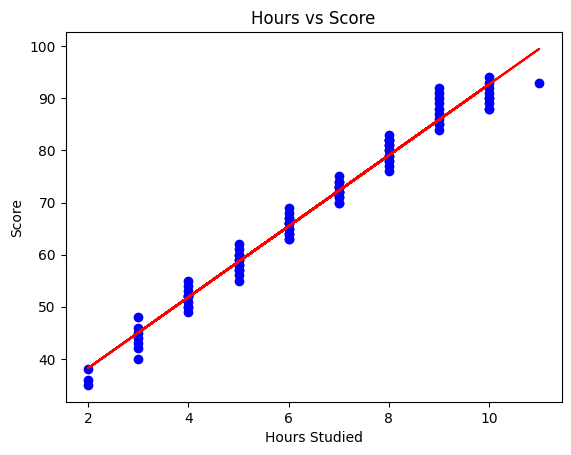

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X,y, color="blue")
plt.plot(X, model.predict(X), color="red")
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

mse = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2 : {r2:.3f}")

MSE : 1.65
RMSE : 1.28
R2 : 0.984


In [77]:
import pandas as pd
# Create dataset
data = {
    "Hours": [1, 2, 3, 4, 5, 6, 7, 8],
    "Score": [35, 42, 51, 60, 68, 77, 85, 90]
}
df = pd.DataFrame(data)
print(" Dataset Loaded Successfully!\n")
print(df)

 Dataset Loaded Successfully!

   Hours  Score
0      1     35
1      2     42
2      3     51
3      4     60
4      5     68
5      6     77
6      7     85
7      8     90


In [78]:
X = df[["Hours"]]   # Features (independent variable)
y = df["Score"]     # Target (dependent variable)

print("Feature Sample:\n", X.head())
print("Target Sample:\n", y.head())

Feature Sample:
    Hours
0      1
1      2
2      3
3      4
4      5
Target Sample:
 0    35
1    42
2    51
3    60
4    68
Name: Score, dtype: int64


In [108]:
from sklearn.linear_model import LinearRegression
# Create and train model
model = LinearRegression()
model.fit(X, y)
print("Model Trained Successfully!")
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

Model Trained Successfully!
Slope (Coefficient): 8.166666666666671
Intercept: 26.74999999999998


In [111]:
# Predict using trained model
x_test = [[10],[11],[12], [13], [14],[15],[16],[24]]
y_pred = model.predict(X)
# Display comparison
df["Predicted_Score"] = y_pred.round(2)
print("\n Actual vs Predicted Scores:\n")
print(df)


 Actual vs Predicted Scores:

   Hours  Score  Predicted_Score
0      1     35            34.92
1      2     42            43.08
2      3     51            51.25
3      4     60            59.42
4      5     68            67.58
5      6     77            75.75
6      7     85            83.92
7      8     90            92.08


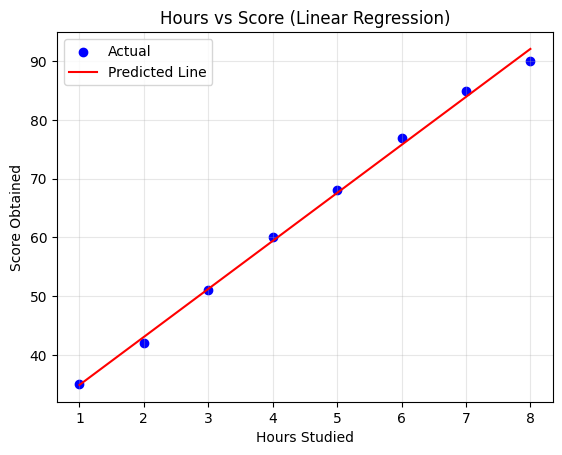

In [103]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', label="Actual")
plt.plot(X, y_pred, color='red', label="Predicted Line")
plt.title("Hours vs Score (Linear Regression)")
plt.xlabel("Hours Studied")
plt.ylabel("Score Obtained")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [112]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("\n Model Evaluation:")
print("Mean Squared Error (MSE):", round(mse, 3))
print("R² Score:", round(r2, 3))


 Model Evaluation:
Mean Squared Error (MSE): 1.104
R² Score: 0.997
